In [108]:
#Faruk Aygün - 150101040
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
dataset = pd.read_csv("Mall_Customers.csv") 
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [110]:
# Expenditures made by people according to their age and income. 

income = dataset['Annual Income (k$)'].values
score = dataset['Spending Score (1-100)'].values
age = dataset['Age'].values

# income, score and age are combined. 
X = np.c_[age, income, score]

m=X.shape[0] # 200
n=X.shape[1] # 3

print(X)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


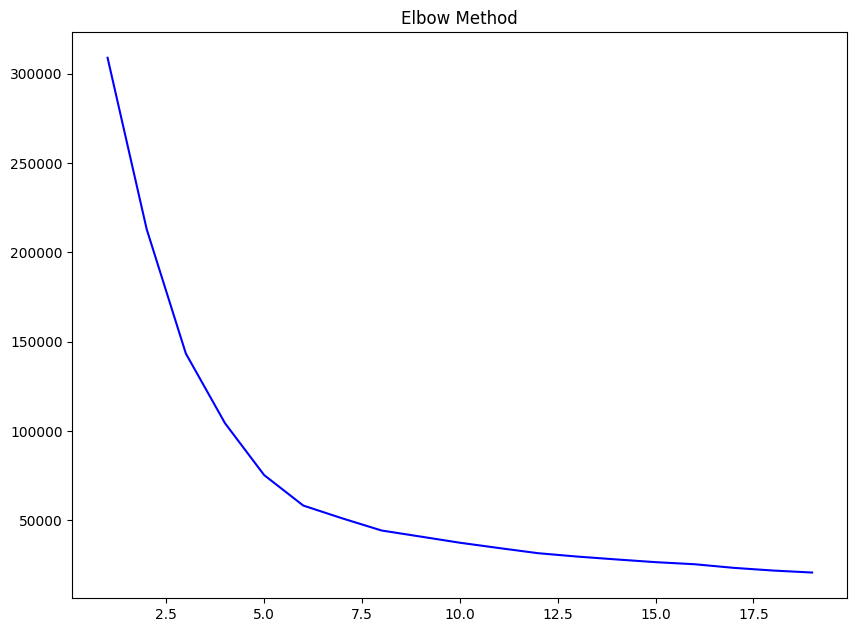

In [111]:
# Elbow Algorithm
# the maximum break occurs at x = 5. 
# cluster number is 5 

import seaborn as sns
from sklearn.cluster import KMeans
elbow=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
sns.lineplot(range(1, 20), elbow,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Elbow Method')
plt.show()

In [112]:
# cluster number
K=5

# creating an empty centroid array
#Gives a new shape to an array without changing its data.

centroids=np.array([]).reshape(n,0) 

import random
# choosing random cluster points from dataset
for k in range(K):
    centroids=np.c_[centroids,X[random.randint(0,m-1)]]

print("centroids\n", centroids)

centroids
 [[ 29.  39.  45.  50.  34.]
 [ 98.  69.  28.  40. 103.]
 [ 88.  91.  32.  55.  23.]]


In [113]:
output={}

euclid=np.array([]).reshape(m,0)

# Euclidean distance for distance between points. 
# Intra-cluster changes are calculated 
for k in range(K):
       dist=np.sum((X-centroids[:,k])**2, axis=1)
       euclid=np.c_[euclid,dist]

# storing the minimum value indices
minimum=np.argmin(euclid,axis=1) + 1

In [114]:
 # mean of clusters
cent={}
# K = 5
for k in range(K):
    cent[k+1]=np.array([]).reshape(3,0)
# output: cent: {[], [], [], [], []}

# assigning to clusters
for k in range(m):
    cent[minimum[k]]=np.c_[cent[minimum[k]],X[k]]

for k in range(K):
    cent[k+1]=cent[k+1].T

# update clusters
for k in range(K):
     centroids[:,k]=np.mean(cent[k+1],axis=0)

In [115]:
# iterations
mistake = 0
temp_mistake = 0     

# 50 is the maximum number of iterations 
for i in range(50):
      euclid=np.array([]).reshape(m,0)
      for k in range(K):
          dist=np.sum((X-centroids[:,k])**2,axis=1)
          euclid=np.c_[euclid,dist]
      
      C=np.argmin(euclid,axis=1)+1

      for j in range(len(C)):
        y = C[j] - 1
        mistake = mistake +  euclid[j, y]
      print("MİSTAKE:", mistake, " i: ", i)

      if temp_mistake == mistake:
        break;
      temp_mistake = mistake
      mistake = 0

      cent={}
      for k in range(K):
           cent[k+1]=np.array([]).reshape(3,0)
      for k in range(m):
           cent[C[k]]=np.c_[cent[C[k]],X[k]]
      for k in range(K):
           cent[k+1]=cent[k+1].T
      for k in range(K):
           centroids[:,k]=np.mean(cent[k+1],axis=0)
      final=cent


MİSTAKE: 103042.88755938642  i:  0
MİSTAKE: 102314.49378859982  i:  1
MİSTAKE: 101860.75273799241  i:  2
MİSTAKE: 100341.3159218025  i:  3
MİSTAKE: 94257.94065401587  i:  4
MİSTAKE: 81133.66333316578  i:  5
MİSTAKE: 75493.84464013916  i:  6
MİSTAKE: 75493.84464013916  i:  7


Text(0.5, 1.0, 'Original Dataset')

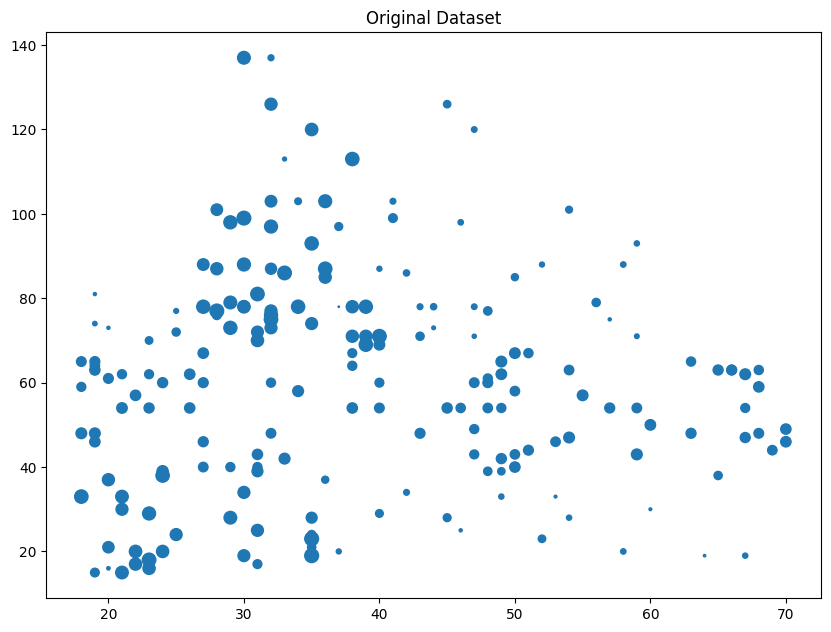

In [116]:
plt.scatter(X[:,0],X[:,1],X[:,2])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Original Dataset')

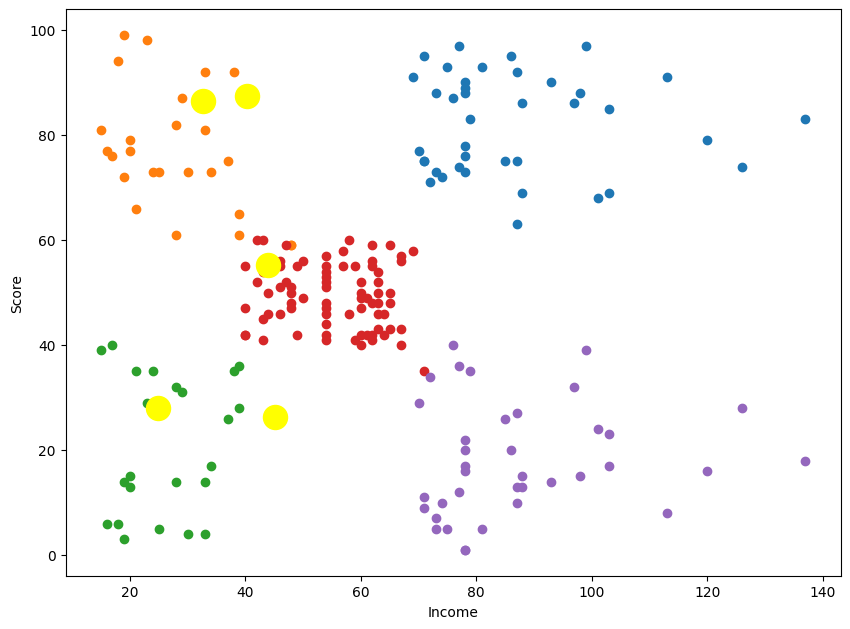

In [117]:
for k in range(K):
    plt.scatter(final[k+1][:,1],final[k+1][:,2])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})

plt.xlabel('Income')
plt.ylabel('Score')

plt.show()

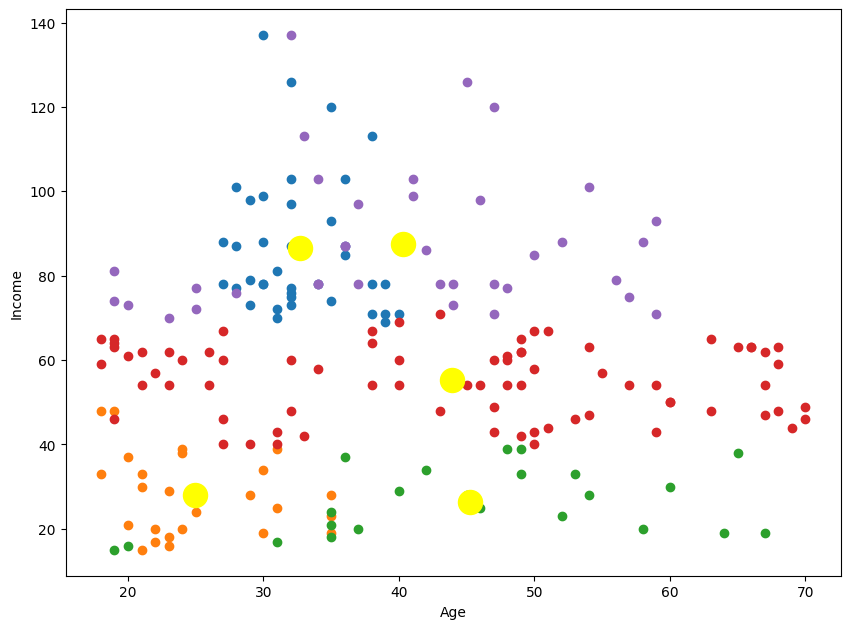

In [118]:
for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,1])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})

plt.xlabel('Age')
plt.ylabel('Income')

plt.show()

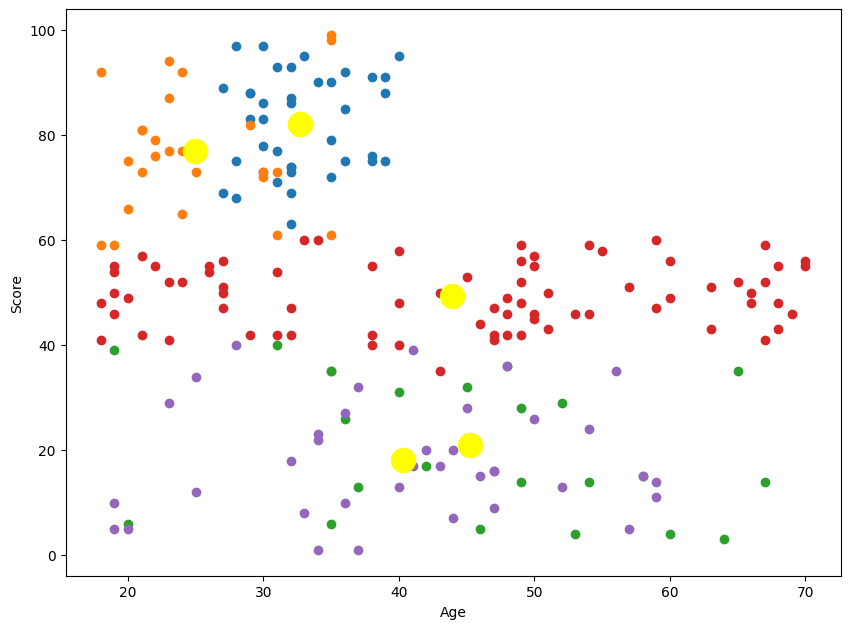

In [119]:
for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,2])
plt.scatter(centroids[0,:],centroids[2,:],s=300,c='yellow')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})

plt.xlabel('Age')
plt.ylabel('Score')

plt.show()

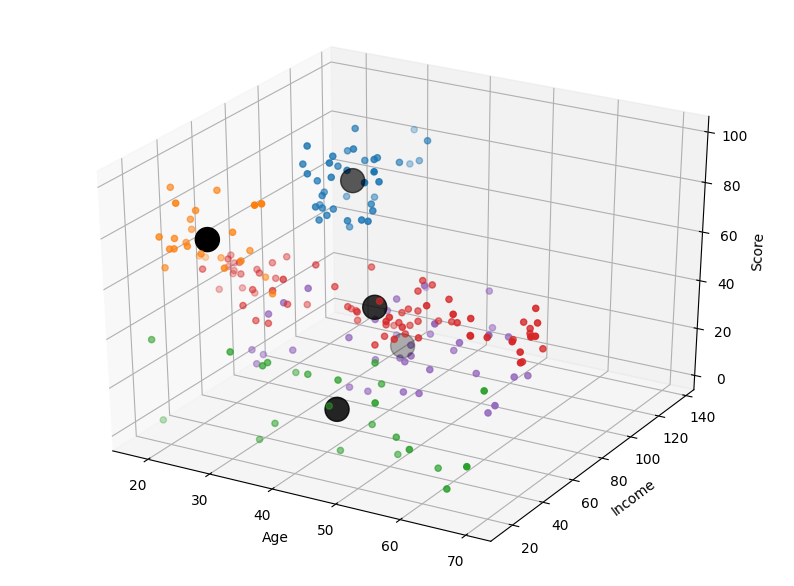

In [120]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for k in range(K):
    ax.scatter(final[k+1][:,0], final[k+1][:,1], final[k+1][:,2])
ax.scatter(centroids[0,:],centroids[1,:],centroids[2,:], s=300,c='black')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})

ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Score')

plt.show()